In [73]:
import pandas as pd

raw_combined_series = pd.read_csv(r'C:\Users\data science\Downloads\GitHub_Repositories\OTT_SUGGESTER\data\raw\raw_combined_series.csv')

# remove unnecessary columns
cleaned_series = raw_combined_series.drop(columns=['show_id', 'director', 'date_added', 'cast', 'type'])

# rename columns
cleaned_series = cleaned_series.rename(columns={'listed_in': 'genre', 'Platform': 'platform', 'duration': 'duration_seasons'})

' Remove Seasons and Season from duration '
cleaned_series['duration_seasons'] = cleaned_series['duration_seasons'].str.replace(' Seasons', '')
cleaned_series['duration_seasons'] = cleaned_series['duration_seasons'].str.replace(' Season', '').astype(int)

cleaned_series

#cleaned_series.to_csv('file location.cleaned_combined_series.csv')

,title,country,release_year,rating,duration_seasons,genre,description,platform
0,Blood & Water,South Africa,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
1,Ganglands,NaN,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
2,Jailbirds New Orleans,NaN,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
3,Kota Factory,India,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
4,Midnight Mass,NaN,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Netflix
...,...,...,...,...,...,...,...,...
4923,X-Men: Evolution,United States,2000,TV-Y7,4,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,Disney+
4924,Smart Guy,United States,1996,TV-G,3,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,Disney+
4925,Disney Kirby Buckets,United States,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,Disney+
4926,Disney Mech-X4,Canada,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,Disney+


##                Visualization

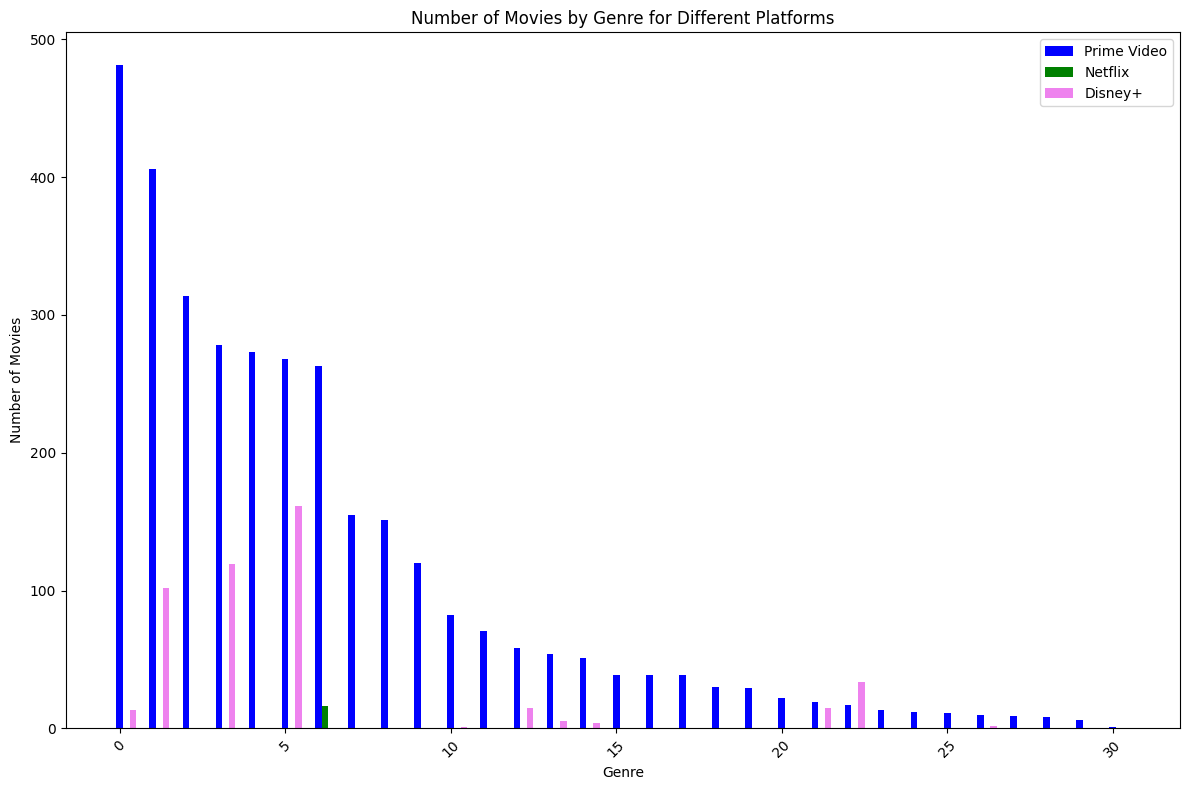

In [83]:
import matplotlib.pyplot as plt

# Separate Netflix, Prime, Disney+ data
netflix_df = cleaned_series[cleaned_series['platform'] == 'Netflix']
prime_video_df = cleaned_series[cleaned_series['platform'] == 'Prime Video']
disney_plus_df = cleaned_series[cleaned_series['platform'] == 'Disney+']

# Count the number of movies for each genre
netflix_genre_counts = netflix_df['genre'].str.split(', ').explode().value_counts()
prime_genre_counts = prime_video_df['genre'].str.split(', ').explode().value_counts()
disney_genre_counts = disney_plus_df['genre'].str.split(', ').explode().value_counts()


# Set up the figure size
plt.figure(figsize=(12, 8))

# Determine the number of unique genres to set the bar positions
n_genres = len(prime_genre_counts)
index = range(n_genres)

# Bar settings
bar_width = 0.2

# Plot Prime genre counts
plt.bar(index, prime_genre_counts, bar_width, color='blue', label='Prime Video')

# Adjust the position for Netflix genre counts by adding bar_width to the index positions
index_netflix = [i + bar_width for i in index]

# Adjust index for Disneygenre counts by adding bar_width to index_netflix to place it infront of netflix bar plot
index_disney = [j + bar_width for j in index_netflix]


#plt.bar(index_netflix, genre_counts_netflix, bar_width, color='green', label='Netflix')
plt.bar(index_netflix, netflix_genre_counts.reindex(prime_genre_counts.index).fillna(0), bar_width, color='green', label='Netflix')
plt.bar(index_disney, disney_genre_counts.reindex(prime_genre_counts.index).fillna(0), bar_width, color='violet', label='Disney+')

# Add title and labels
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre for Different Platforms')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\data science\AppData\Local\Temp\ipykernel_21732\1977428125.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_platform['genres'] = genres_platform['listed_in'].str.split(', ')


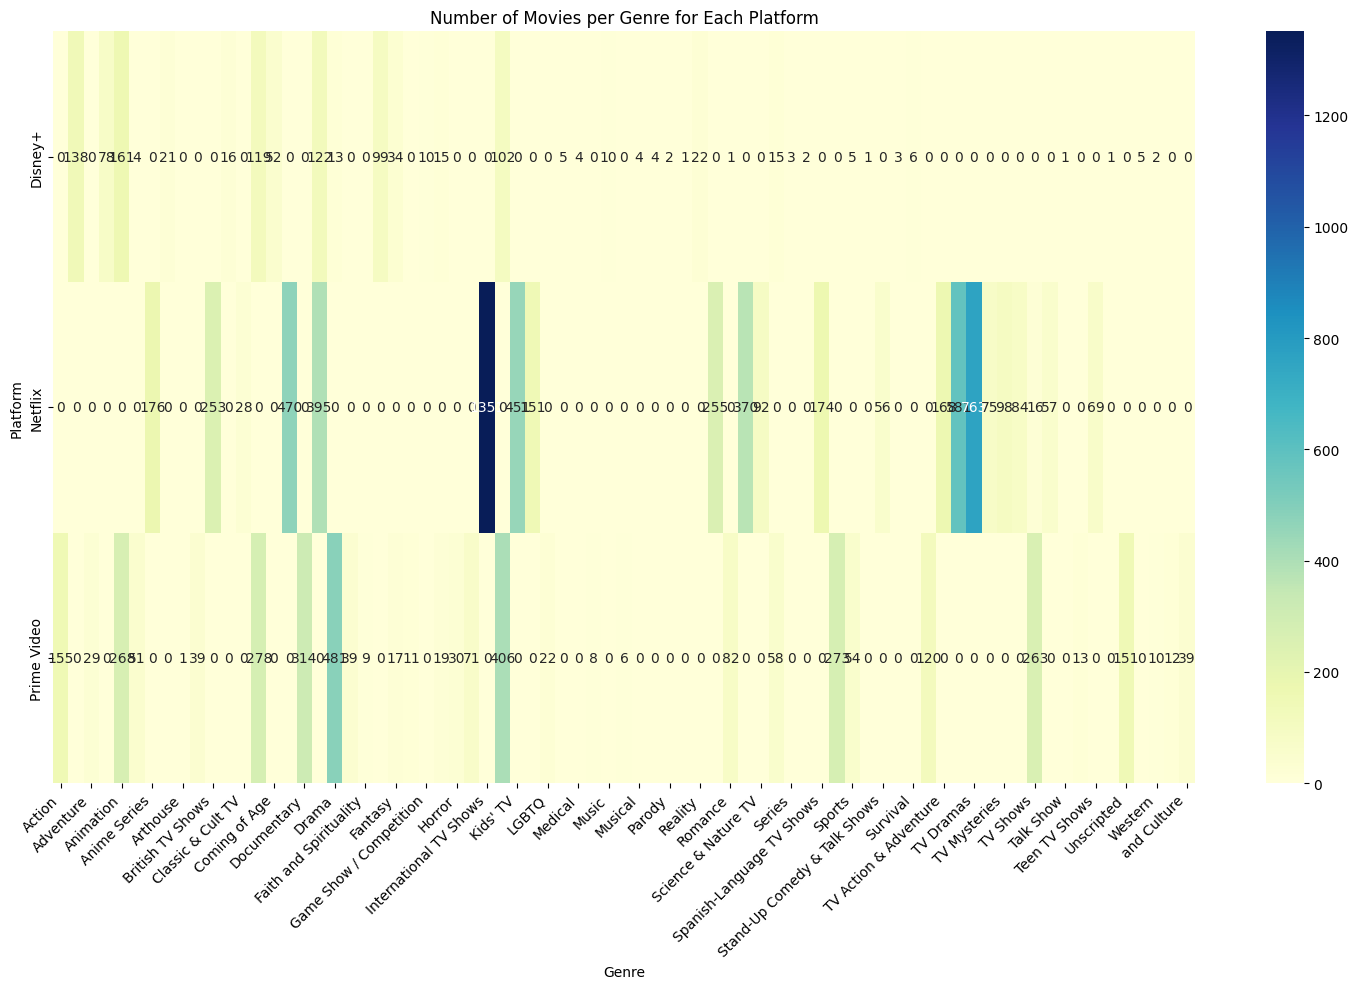

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r'C:\Users\data science\Downloads\GitHub_Repositories\OTT_SUGGESTER\data\clean\clean_combined_series.csv'
data = pd.read_csv(file_path)

# Extract genres and platform information
genres_platform = data[['listed_in', 'platform']]
# Splitting the genres into a list
genres_platform['genres'] = genres_platform['listed_in'].str.split(', ')
# Exploding the dataframe so each genre has its own row
exploded_genres = genres_platform.explode('genres')
# Counting the number of occurrences per genre for each platform
genre_platform_counts = exploded_genres.groupby(['platform', 'genres']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 10))
sns.heatmap(genre_platform_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Movies per Genre for Each Platform')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
